 # Mushrooms are poisonous or edible.

### Importing all neccessary modules

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

## Load the data


In [2]:
df = pd.read_csv('Dataset/agaricus-lepiota(1).data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


### Rename columns

In [3]:
cols_name=['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
           'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
           'gill-color', 'stalk-shape', 'stalk-root',
           'stalk-surface-above-ring', 'stalk-surface-below-ring',
           'stalk-color-above-ring', 'stalk-color-below-ring',
           'veil-type', 'veil-color', 'ring-number', 'ring-type',
           'spore-print-color', 'population', 'habitat']

df.columns= cols_name

### basic info about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises?                  8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

In [5]:
for col in df.columns:
    print(f'{col} {df[col].unique()}')

classes ['e' 'p']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises? ['t' 'f']
odor ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['c' 'e' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['n' 's' 'a' 'v' 'y' 'c']
habitat ['g' 'm' 'u' 'd' 'p' 'w' 'l']


The column "stalk_root" has a question mark. So, this is a sign of missing data.

In [6]:
vals= df['stalk-root'].value_counts()
for idx, each in zip(vals.index, vals):
    print(f'{idx} : {each} | {round(each/sum(vals)*100,2)}%')

b : 3776 | 46.49%
? : 2480 | 30.53%
e : 1119 | 13.78%
c : 556 | 6.84%
r : 192 | 2.36%


In [7]:
df= df.drop('stalk-root', axis=1)

### Classes distribution

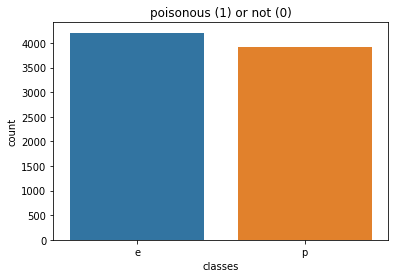

In [8]:
sns.countplot(df.classes)
plt.title('poisonous (1) or not (0)')
plt.show()

Fairly balanced classes here.

## LabelEncode

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in df.columns:
    df[col]= le.fit_transform(df[col])
    
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


### Split the data

In [10]:
from sklearn.model_selection import train_test_split
y= df['classes']
X= df.drop('classes', axis=1)

X= pd.get_dummies(X, columns= X.columns, drop_first=True)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

### Train model

In [11]:
tree_dt= DecisionTreeClassifier(max_depth=5)
tree_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_preds = tree_dt.predict(X_test)

## Model

In [13]:
model_tn = DecisionTreeClassifier(max_depth=5)
model_tn.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
predict_md= model_tn.predict(X_test)
prediction= model_tn.predict(X_train)

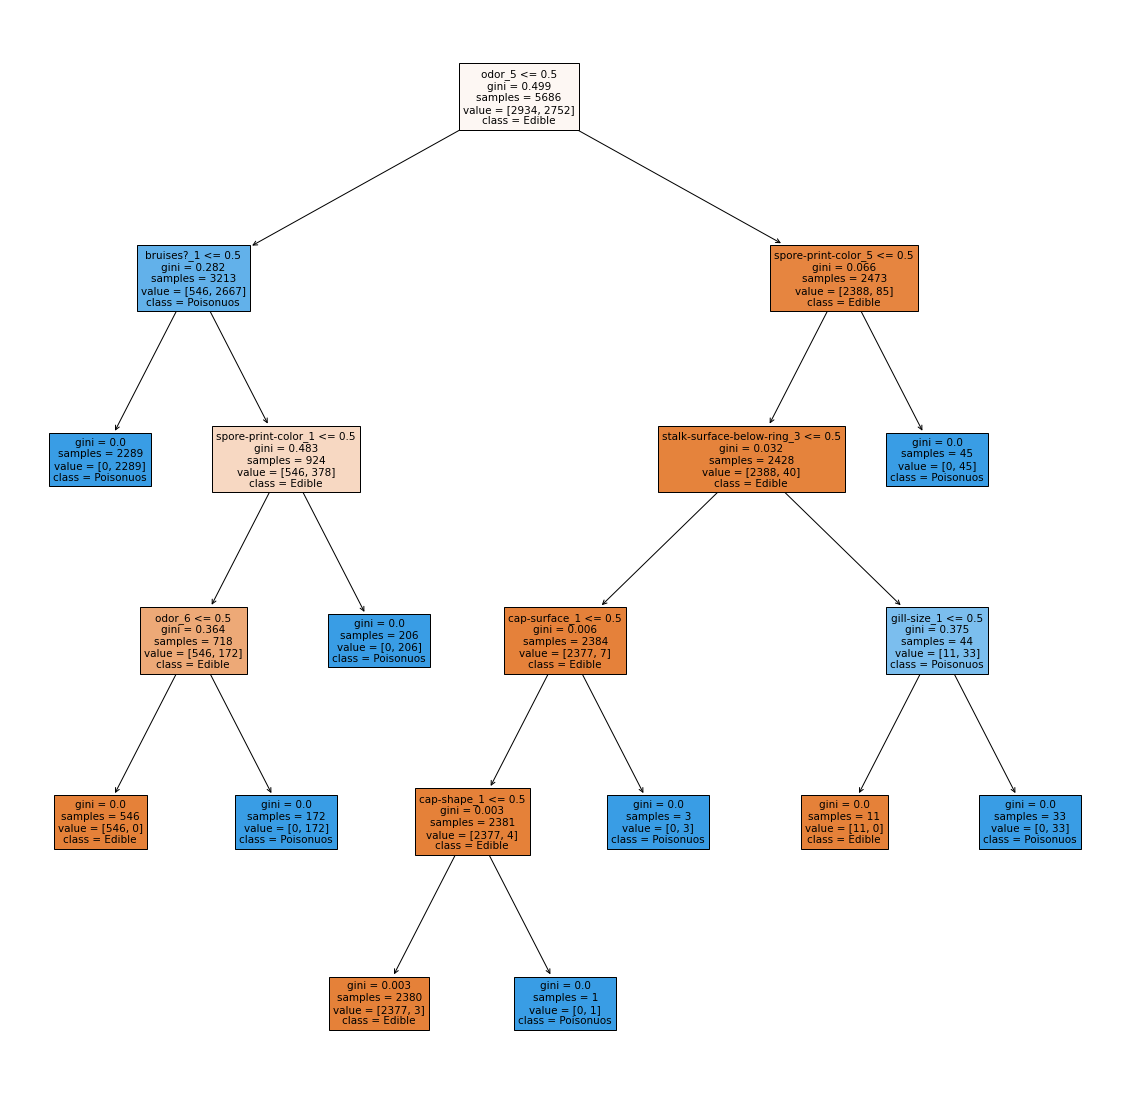

In [15]:
plt.figure(figsize=[20,20])
plot_tree(model_tn, feature_names=X.columns, class_names=['Edible', 'Poisonuos'], filled=True)
plt.show()

In [16]:
imf= tree_dt.feature_importances_
imf= list(zip(X_train.columns, imf))

m= pd.DataFrame(imf)
important_features= m.sort_values(1, ascending=False)
n=important_features[important_features[1]>0]

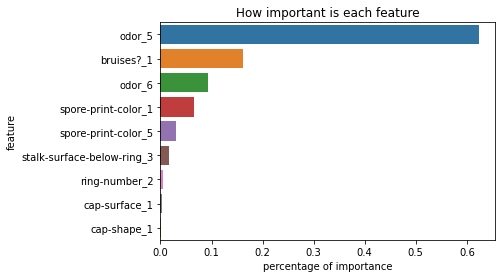

In [17]:
sns.barplot(y=n[0], x=n[1])
plt.xlabel('percentage of importance')
plt.ylabel('feature')
plt.title('How important is each feature')
plt.show()

In the above result shows the best way to tell if mushroom is poisonous by smell. 
Therefore, if it smells bad, theres a north of 60% chances that it is poisonous.

### important Metrics

In [18]:
print("The model has a Accuracy value of :", metrics.accuracy_score(y_test, predict_md))
print("The model has a Precision value of :", metrics.precision_score(y_test, predict_md))
print("The model has a Recall value of :", metrics.recall_score(y_test, predict_md))

The model has a Accuracy value of : 1.0
The model has a Precision value of : 1.0
The model has a Recall value of : 1.0


### conclusion

The decision tree proved to be a very powerful learning algorithm for fitting complex data. More data may be needed to fully tell how our model performs as there are roughly 140 000 species of mushrooms in the world and less than 10% of them are edible.